## Programming assignment | Корреляционный анализ

1. Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

    Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки. 

In [1]:
import pandas as pd
import seaborn as sns
from math import sqrt

In [2]:
data = pd.read_csv("illiteracy.txt", sep='\t')

In [3]:
data.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [4]:
data.columns

Index(['Country', 'Illit', 'Births'], dtype='object')

In [5]:
data[['Illit','Births']].corr()

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


2. Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.

In [6]:
data[['Illit','Births']].corr (method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


3. Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.
    
   Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.
    

In [7]:
data = pd.read_csv("water.txt", sep='\t')

In [8]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [9]:
data[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


4. В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки. 

In [10]:
data[['mortality','hardness']].corr (method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


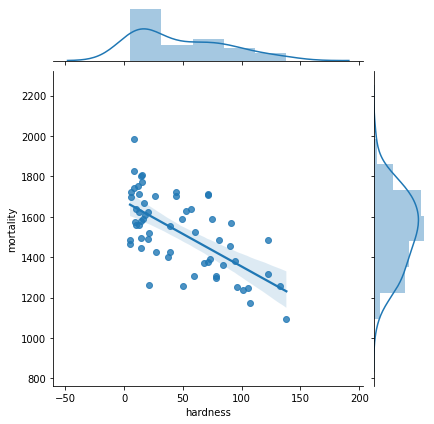

In [11]:
sns.jointplot('hardness', 'mortality', data, kind="reg");

5. Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [14]:
south = data.loc[(data['location']== 'South')]

In [15]:
north = data.loc[(data['location']== 'North')]

In [16]:
south[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [17]:
north[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


6. Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.  

    Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [18]:
a, b, c, d = 203, 239, 718, 515

In [19]:
(a*d - b*c) / sqrt((a + b)*(a + c)*(b + d)*(c + d))

-0.10900237458678963

7. В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры.

In [20]:
from scipy import stats
import numpy as np

In [21]:
stats.chi2_contingency([[a, b], [c, d]])[1]*100

0.0010558987006638726

8. Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"
    Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.
    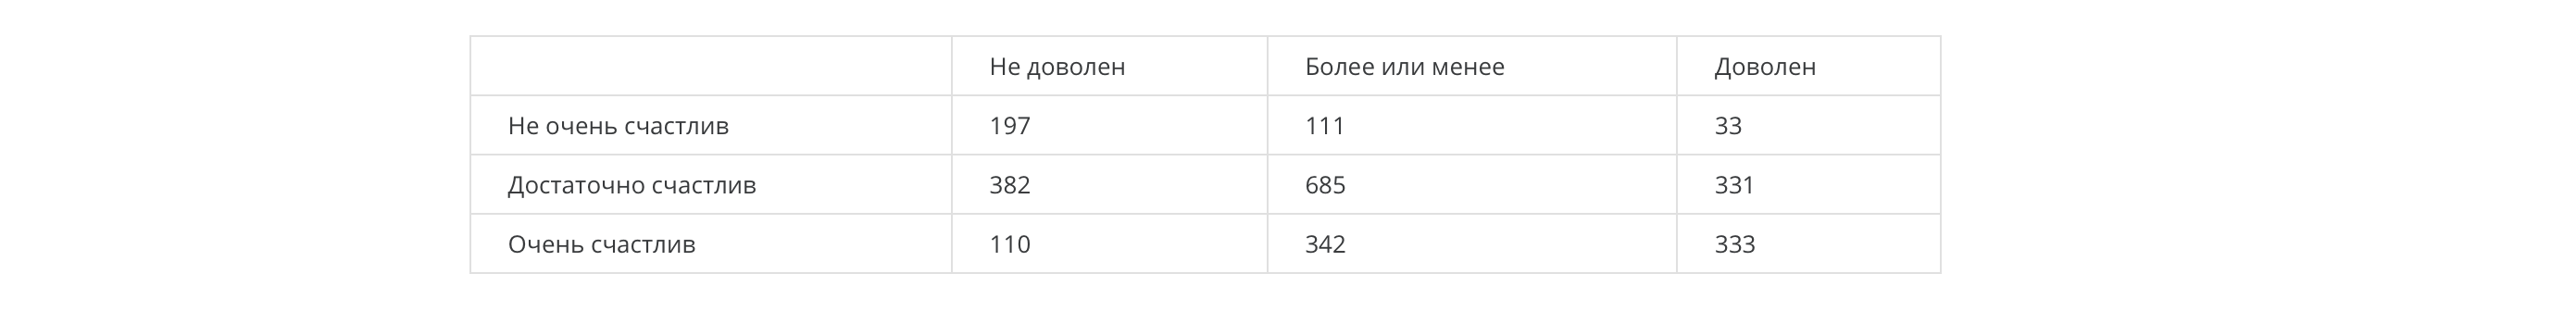

In [22]:
happiness = np.array( [[197., 111., 33. ],
                       [382., 685., 331.],
                       [110., 342., 333.]] )

In [24]:
stats.chi2_contingency(happiness)[0]

293.68311039689746

9. Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки. 

In [25]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [26]:
cramers_stat(happiness)

0.2412013934500338